In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('iris.csv')

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.shape

(150, 5)

In [5]:
X = np.column_stack((data['sepal_length'], data['petal_length']))
y = data['species']

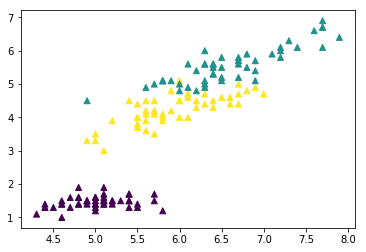

In [6]:
clf = svm.SVC(kernel = 'linear', C = 2.0)
clf.fit(X, y)

m = {'setosa': 0,'virginica': 1, 'versicolor':2}
y = [m[item] for item in y]

plt.scatter(X[:, 0], X[:, 1], c = y, marker = '^')

In [7]:
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(4, 7)
yy = a * xx - clf.intercept_[0] / w[1]

margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

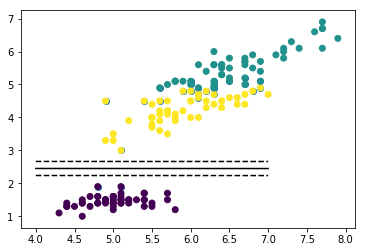

In [11]:
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1])

Xp = np.column_stack((data['sepal_length'], data['petal_length']))
y = clf.predict(Xp)

m = {'setosa': 0,'virginica': 1, 'versicolor':2}
y = [m[item] for item in y]

plt.scatter(Xp[:, 0], Xp[:, 1], c = y, marker = 'o')

plt.show()